# Advection Equation

Here we solve the advection equation $u_t + a u_x=0$ using as an initial condition a gaussian profile $u(x,t=0)=\exp{[-(x-x_0)^2]}$ with $x_0=5$.

We use a domain $x\in [0,10]$ with outflow boundary conditions.

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os

# Define the speed a
a = 1.0

# Define the domain
L = 10.0        # Domain length
nx = 100001        # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

# Define the time step and the final time
cf = 0.5
dt = cf*dx/a    # Time step
t_final = 20.0

print('nx=', nx)
print('dx=', dx)
print('dt=', dt)
print('Number of iterations=', t_final/dt)


# Define the initial condition
x0 = 5
u_initial = np.exp(-(x-x0)**2)

# Initialize the solution array
u_current = u_initial.copy()
u_previous = u_initial.copy()

# We create arrays where we will store the time and the l2norm
l2norm = []
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time = []
time.append(0.0)

nx= 100001
dx= 0.0001
dt= 5e-05
Number of iterations= 400000.0


## The outflow boundary condition

### $u^n_{j-1}$

In [67]:
array = np.array(['u1', 'u2', 'u3', 'u4', 'u5', 'u6', 'u7', 'u8', 'u9'])
array

array(['u1', 'u2', 'u3', 'u4', 'u5', 'u6', 'u7', 'u8', 'u9'], dtype='<U2')

Periodic boundary condition

In [68]:
array_minus_one = np.roll(array, 1)
array_minus_one 

array(['u9', 'u1', 'u2', 'u3', 'u4', 'u5', 'u6', 'u7', 'u8'], dtype='<U2')

Outflow boundary condition

In [69]:
array_minus_one[0] = array_minus_one[1]
array_minus_one

array(['u1', 'u1', 'u2', 'u3', 'u4', 'u5', 'u6', 'u7', 'u8'], dtype='<U2')

### $u^n_{j+1}$

Periodic boundary condition

In [70]:
array_minus_one = np.roll(array, -1)
array_minus_one 

array(['u2', 'u3', 'u4', 'u5', 'u6', 'u7', 'u8', 'u9', 'u1'], dtype='<U2')

Outflow boundary condition

In [71]:
array_minus_one[-1] = array_minus_one[-2]
array_minus_one

array(['u2', 'u3', 'u4', 'u5', 'u6', 'u7', 'u8', 'u9', 'u9'], dtype='<U2')

## Implementation

In [72]:
# Initilize time and iteration counter
t = 0.0
i = 0

# Save the initial conditions
plt.plot(x, u_current)
plt.title(f'Time={round(t,2):.2f}')
plt.ylim(0, 1.1)
plt.savefig('./images/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final:
    print(math.ceil(100*t/t_final), "%", end='\r')
    
    # Compute the new solution using various methods
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and np.roll(u_current,  1) is equivalent to u(j-1)
    # Using np.roll is equivalent to use periodic boundary conditions
    
    u_current_minus_one = np.roll(u_current, 1)
    u_current_minus_one[0] = u_current_minus_one[1]
    u_current_plus_one = np.roll(u_current, -1)
    u_current_plus_one[-1] = u_current_minus_one[-2]
    
    # 1) Leapfrog (first step with Lax-Friedrichs)
    #if t==0: 
    #    u_next = 0.5*(u_current_plus_one + u_current_minus_one) - a*dt/(2*dx)*(u_current_plus_one - u_current_minus_one)
    #    print('First step with Lax-Friedrichs')
    #else :
    #    u_next = u_previous - (a*dt/dx)*(u_current_plus_one - u_current_minus_one)
    #    u_previous = u_current.copy() 
    
    # 2) Lax-Wendroff
    u_next = u_current - a*dt/(2*dx)*(u_current_plus_one - u_current_minus_one) + (a**2)*(dt**2)/(2*dx**2)*(u_current_minus_one - 2*u_current + u_current_plus_one)
    
    
    # Update the solution
    u_current = u_next.copy()
    
    # Advance the time 
    t += dt
    i += 1
    
    # Compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
    
    # Plot the current result and save in an image every t_final/dt/100 iterations
    if (i%(t_final/dt/100)==0):
        plt.plot(x, u_current)
        plt.title(f'Time={round(t,2):.2f}')
        plt.ylim(0,1.1)
        plt.savefig('./images/fig_'+str(i).zfill(6)+'.png', dpi=200)
        plt.close()

In [73]:
#np.save('./results/Outflow_Leapfrog_u'+str(nx-1)+'.npy', u_current)
#np.save('./results/Outflow_Leapfrog_l2norm'+str(nx-1)+'.npy', l2norm)
np.save('./results/Outflow_LaxWendroff_u'+str(nx-1)+'.npy', u_current)
np.save('./results/Outflow_LaxWendroff_l2norm'+str(nx-1)+'.npy', l2norm)

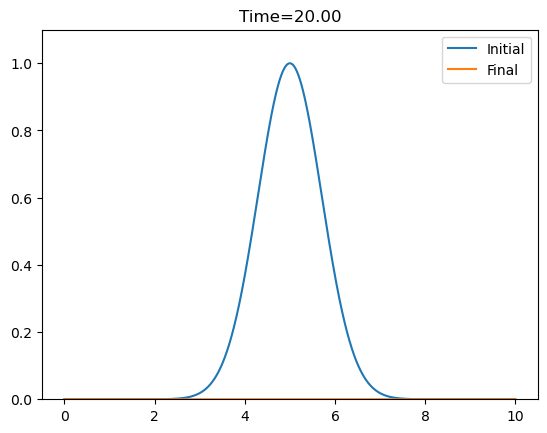

In [74]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final')
plt.title(f'Time={round(t,2):.2f}')
plt.ylim(0, 1.1)
plt.legend()
plt.show()

In [75]:
# Set the directory where your images are stored
directory = "./images/"

# Get the list of image files in the directory
files = os.listdir(directory)

# Sort the files in alphanumeric order
files = sorted(files)

print(files)

import imageio
with imageio.get_writer('./images/movie.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread('./images/'+file)
        writer.append_data(image)

['fig_00000.png', 'fig_004000.png', 'fig_008000.png', 'fig_012000.png', 'fig_016000.png', 'fig_020000.png', 'fig_024000.png', 'fig_028000.png', 'fig_032000.png', 'fig_036000.png', 'fig_040000.png', 'fig_044000.png', 'fig_048000.png', 'fig_052000.png', 'fig_056000.png', 'fig_060000.png', 'fig_064000.png', 'fig_068000.png', 'fig_072000.png', 'fig_076000.png', 'fig_080000.png', 'fig_084000.png', 'fig_088000.png', 'fig_092000.png', 'fig_096000.png', 'fig_100000.png', 'fig_104000.png', 'fig_108000.png', 'fig_112000.png', 'fig_116000.png', 'fig_120000.png', 'fig_124000.png', 'fig_128000.png', 'fig_132000.png', 'fig_136000.png', 'fig_140000.png', 'fig_144000.png', 'fig_148000.png', 'fig_152000.png', 'fig_156000.png', 'fig_160000.png', 'fig_164000.png', 'fig_168000.png', 'fig_172000.png', 'fig_176000.png', 'fig_180000.png', 'fig_184000.png', 'fig_188000.png', 'fig_192000.png', 'fig_196000.png', 'fig_200000.png', 'fig_204000.png', 'fig_208000.png', 'fig_212000.png', 'fig_216000.png', 'fig_22000

C:\Users\Marco\AppData\Local\Temp\ipykernel_4304\1298765993.py:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('./images/'+file)


In [76]:
# Don't worry about the code in this cell, it is just to let you display the movies you generated above in Jupyter notebook
#from IPython.display import HTML
#
#HTML("""
#<div align="middle">
#<video width="80%" controls>
#      <source src="./images/movie.mp4" type="video/mp4">
#</video></div>""")

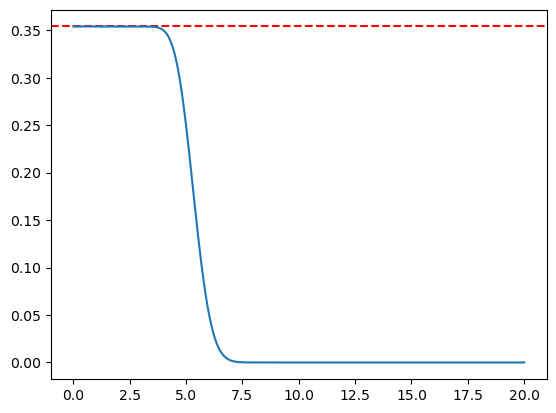

In [77]:
# Compare with data stored
#l2_saved=np.genfromtxt('./l2norm_FTCS.dat', comments='#')
#l2_saved=np.genfromtxt('./l2norm_LAX.dat', comments='#')
#l2_saved=np.genfromtxt('./l2norm_LEAPFROG.dat', comments='#')
#l2_saved=np.genfromtxt('./l2norm_LAXWENDROFF.dat', comments='#')
plt.plot(time, l2norm)
plt.axhline(l2norm[0], ls='--', color='red', zorder=0)
#plt.plot(l2_saved[:,0], l2_saved[:,1], '+')
#plt.savefig('./images/l2norm.png', dpi=200)
plt.show()